### Problem description


### Fixed effects model

In fixed effect model coefficients of a linear model are the same for all samples. Variance is explained by ${\epsilon}_{i}$, which is assumed to be iid and ${\epsilon}_{i} = \mathcal N(0,{\sigma}_{\epsilon})$.

Likelihood 

\begin{equation}
{Wake}_{i} = {\beta}_{0} + {\beta}_{1}{Treatment}_{i} + {\beta}_{2}{Genotype}_{i} + {\epsilon}_{i}
\end{equation}

or alternatively

\begin{equation}
{Wake}_{i} = \mathcal N({\mu}_{i},{\sigma}_{\epsilon})\\
{\mu}_{i} = {\beta}_{0} + {\beta}_{1}{Treatment}_{i} + {\beta}_{2}{Genotype}_{i}\\
{\sigma}_{\epsilon} \sim Uniform(0,\infty)
\end{equation}

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data.csv")
data.head(10)

,id,NREM,REM,WAKE,Genotype,Treatment
0,8,36.172007,5.185497,58.642496,1,3
1,18,33.702835,3.837135,62.460030,0,3
2,6,57.606145,3.520376,38.873480,1,0
3,9,50.582650,8.955546,40.461804,0,0
4,17,35.646347,3.415478,60.938176,0,3
5,14,57.264584,11.426699,31.308718,0,0
6,11,33.987216,5.378003,60.634781,1,3
7,10,53.799880,8.602366,37.597754,0,0
8,12,46.321746,5.557801,48.120453,0,3
9,5,36.586851,3.530844,59.882305,0,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         33 non-null     int64  
 1   NREM       33 non-null     float64
 2   REM        33 non-null     float64
 3   WAKE       33 non-null     float64
 4   Genotype   33 non-null     int64  
 5   Treatment  33 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 KB


In [6]:
data_dict = data.to_dict()

N         = data.shape[0]
treatment = list(data_dict['Treatment'].values())
genotype  = list(data_dict['Genotype'].values())
wake      = list(data_dict['WAKE'].values())

stan_data = {"N": N,
             "y": wake,
             "treat": treatment,
             "gen": genotype
            }

In [7]:
import nest_asyncio
nest_asyncio.apply()
import stan

stan_code = """
data {
  int<lower=0> N;                         // n.o. samples
  real y[N];                              // measurments, response var
  int<lower=0,upper=1> gen[N];            // predictor genotype
  real treat[N];          // predictor treatment
}

parameters {
  real<lower=0> sigma;    // sheared standard deviation 
  vector[3] beta;         //intercept and slopes
}

model {
  real mu;
  for (i in 1:N){
      mu = beta[1] + beta[2]*treat[i] + beta[3]*gen[i];
      y[i] ~ normal(mu, sigma);
      }
}

generated quantities {
    real ypred[N];
    real mu;
    
    for (i in 1:N){
      mu = beta[1] + beta[2]*treat[i] + beta[3]*gen[i];
      ypred[i] = normal_rng(mu, sigma);
      }
}

"""

posterior = stan.build(stan_code, data=stan_data)
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/Users/shamsi/anacon

Building: 4.7s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/err.hpp:50:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/err/hmm_check.h

Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/be

Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.1s
Building: 7.3s
Building: 7.4s
Building: 7.5s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include

Building: 7.6s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include

Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.2s
Building: 8.3s
Building: 8.4s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:121:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~
In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaar

Building: 8.5s
Building: 8.6s
Building: 8.7s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:153:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:40:30: warning: comparison of integers of different signs: 'Eigen::Index' (aka 'long') and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (Eigen::Index k = 0; k < N; ++k) {
                           ~ ^ ~
/Users/shamsi/anaconda3/envs/dlaalto/lib/python

Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.3s
Building: 11.4s
Building: 11.5s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/functor.hpp:28:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/functor/operands_and_partials.hpp:29:1: warning: 'ops_partials_edge' defined as a class template here but previously declared as a struct template; this is valid, but may result in linker errors under the Microsoft C++ ABI [-Wmismatched-tags]
class ops_partials_edge<double, var> {
^

Building: 11.6s
Building: 11.7s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob.hpp:87:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob/double_exponential_cdf.hpp:77:10: warning: unused variable 'N' [-Wunused-variable]
  size_t N = max_size(y, mu, sigma);
         ^
In file included from

Building: 11.8s
Building: 11.9s
Building: 12.0s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob.hpp:139:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob/hmm_marginal.hpp:26:13: warning: unused variable 'n_states' [-Wunused-variable]
  const int n_states = omegas.rows();
            ^


Building: 12.1s
Building: 12.2s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob.hpp:307:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/ma

Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:17:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/indexing.hpp:6:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/indexing/assign.hpp:270:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int, std::__1::allocator<int> >::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < idx.ns_.size(); ++i) {
                  ~ ^ ~~~~~~~~~~~~~~
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/indexing/assign.hpp:538:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int, std::__1::allocator<int> >::size_type' (aka 'unsigned lon

Building: 13.2s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_division.hpp:14:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/

Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/mat

Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.5s
Building: 15.6s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun.hpp:94:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/fun/lb_constrain.hpp:114:33: warning: lambda capture 'lp' is not used [-Wunused-lambda-capture]
                               [lp, arena_lb = var(lb)](auto& vi) mutable {
                                ^
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include

Building: 15.7s
Building: 15.8s


In file included from /Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.cpp:2:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core.hpp:58:
/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:13: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
static void set_zero_all_adjoints() {
            ^
In file included from /Users/shamsi/Library/Caches/ht

Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.3s
Building: 17.4s
Building: 17.5s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.2s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.1s
Building: 19.2s
Building: 19.3s
Building: 19.4s
Building: 19.5s
Building: 19.7s
Building: 19.8s
Building: 19.9s
Building: 20.0s
Building: 20.1s
Building: 20.2s
Building: 20.3s
Building: 20.4s
Building: 20.5s
Building: 20.6s
Building: 20.8s
Building: 20.9s
Building: 21.0s
Building: 21.1s
Building: 21.2s
Building: 21.3s
Building: 21.4s
Building: 21.5s
Building: 21.6s
Building: 21.7s
Building: 21.9s
Building: 22.0s
Building: 22.1s


54 warnings generated.


Building: 22.2s


ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-10.9-x86_64-3.7/Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaarevv/model_spaarevv.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/shamsi/anaconda3/envs/dlaalto/lib/python3.7/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::P2' from file 'build/temp.macosx-10.9-x86_64-3.7/Users/shamsi/Library/Caches/httpstan/4.6.1/models/spaar

Messages from stanc:
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!


In [8]:
az.summary(fit)[:10]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,8.422,1.114,6.445,10.505,0.021,0.015,2964.0,2453.0,1.0
beta[0],44.702,2.486,40.156,49.657,0.058,0.041,1853.0,2003.0,1.0
beta[1],2.917,0.351,2.264,3.587,0.007,0.005,2254.0,2368.0,1.0
beta[2],-0.755,2.965,-5.987,4.980,0.061,0.047,2371.0,2152.0,1.0
ypred[0],52.500,8.727,35.775,68.799,0.136,0.096,4143.0,4040.0,1.0
ypred[1],53.646,8.810,36.243,69.793,0.143,0.101,3801.0,3815.0,1.0
ypred[2],44.102,8.862,26.854,60.753,0.139,0.099,4047.0,3876.0,1.0
ypred[3],44.646,8.682,28.141,60.491,0.136,0.096,4088.0,4103.0,1.0
ypred[4],53.357,8.792,36.018,68.898,0.143,0.101,3794.0,4054.0,1.0
ypred[5],44.705,8.874,27.457,60.666,0.146,0.103,3712.0,3792.0,1.0


In [9]:
print(df.describe().T[:15])

                count       mean       std        min        25%        50%  \
parameters                                                                    
lp__           4000.0 -83.944512  1.476388 -92.796597 -84.673428 -83.623026   
accept_stat__  4000.0   0.916476  0.114297   0.069225   0.887416   0.959881   
stepsize__     4000.0   0.446286  0.041765   0.402023   0.405836   0.447497   
treedepth__    4000.0   2.808000  0.585424   1.000000   2.000000   3.000000   
n_leapfrog__   4000.0   8.115500  3.870453   1.000000   7.000000   7.000000   
divergent__    4000.0   0.000000  0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  85.914292  2.051226  82.195958  84.432622  85.591026   
sigma          4000.0   8.422384  1.113615   5.842321   7.614997   8.326534   
beta.1         4000.0  44.701525  2.486025  35.016075  43.053962  44.616324   
beta.2         4000.0   2.917443  0.351173   1.630461   2.694772   2.916653   
beta.3         4000.0  -0.754811  2.965251 -14.37051

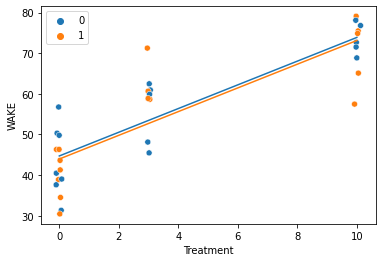

In [13]:
intercept = df["beta.1"].mean()
coeff1 = df["beta.2"].mean()
coeff2 = df["beta.3"].mean()

treat = [0, 3, 10]
genotype = [0, 1]

def jitter(vals):
    return vals + np.random.normal(0,0.05,vals.shape)

ypred = []
for i in range(len(genotype)):
    for j in range(len(treat)):
        ypred.append(intercept + coeff1*treat[j] + coeff2*genotype[i])
    
sns.scatterplot(data=data, x=jitter(data["Treatment"]), y="WAKE", hue="Genotype")
sns.lineplot(x=[0,3,10], y=ypred[:3])
sns.lineplot(x=[0,3,10], y=ypred[3:])
plt.show()

<AxesSubplot:>

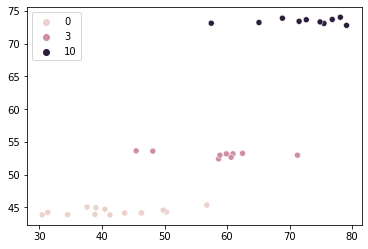

In [14]:
ypreds = df.iloc[-1000:,11:-1].copy()
sns.scatterplot(x=wake, y=list(ypreds.mean()), hue=treatment)